# Download the dataset

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn import tree
from IPython.display import Image
from six import StringIO
import matplotlib.pyplot as plt
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the file from the saved location
input_file = "/content/drive/MyDrive/sena/globalterrorismdb_0522dist.csv"
df = pd.read_csv(input_file, header = 0,usecols=['iyear', 'imonth', 'iday', 'extended', 'country', 'country_txt', 
                                                 'region', 'latitude', 'longitude','success', 'suicide','attacktype1', 
                                                 'attacktype1_txt', 'targtype1', 'targtype1_txt', 'natlty1','natlty1_txt',
                                                 'weaptype1', 'weaptype1_txt' ,'nkill','multiple', 'individual', 
                                                 'claimed','nkill','nkillter', 'nwound', 'nwoundte'])
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            209706 non-null  int64  
 1   imonth           209706 non-null  int64  
 2   iday             209706 non-null  int64  
 3   extended         209706 non-null  int64  
 4   country          209706 non-null  int64  
 5   country_txt      209706 non-null  object 
 6   region           209706 non-null  int64  
 7   latitude         205015 non-null  float64
 8   longitude        205014 non-null  float64
 9   multiple         209705 non-null  float64
 10  success          209706 non-null  int64  
 11  suicide          209706 non-null  int64  
 12  attacktype1      209706 non-null  int64  
 13  attacktype1_txt  209706 non-null  object 
 14  targtype1        209706 non-null  int64  
 15  targtype1_txt    209706 non-null  object 
 16  natlty1          207692 non-null  floa

In [ ]:
 # A dataframe with region South Asia (Afghanistan, Bangladesh, Bhutan, India, Maldives, Mauritius, Nepal, Pakistan, Sri Lanka)
df_SouthAsia= df[df.region == 6]
df_SouthAsia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54725 entries, 585 to 209704
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   iyear            54725 non-null  int64  
 1   imonth           54725 non-null  int64  
 2   iday             54725 non-null  int64  
 3   extended         54725 non-null  int64  
 4   country          54725 non-null  int64  
 5   country_txt      54725 non-null  object 
 6   region           54725 non-null  int64  
 7   latitude         54214 non-null  float64
 8   longitude        54214 non-null  float64
 9   multiple         54725 non-null  float64
 10  success          54725 non-null  int64  
 11  suicide          54725 non-null  int64  
 12  attacktype1      54725 non-null  int64  
 13  attacktype1_txt  54725 non-null  object 
 14  targtype1        54725 non-null  int64  
 15  targtype1_txt    54725 non-null  object 
 16  natlty1          53570 non-null  float64
 17  natlty1_t

# Dropping unnecassary variables

In [ ]:
#claimed, nkillter, nwound, nwoundte -  many of the values are missing.
#Since we use data within South Asia alone,we drop the variable 'region'.
df_SA = df_SouthAsia.drop([ 'region', 'claimed', 'nkillter', 'nwound','nwoundte'], axis=1)  
df_SA.head()

,iyear,imonth,iday,extended,country,country_txt,latitude,longitude,multiple,success,...,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt,individual,weaptype1,weaptype1_txt,nkill
585,1970,11,1,0,153,Pakistan,24.891115,67.143311,0.0,1,...,1,Assassination,7,Government (Diplomatic),161.0,Poland,0,10,Vehicle (not to include vehicle-borne explosiv...,4.0
1186,1972,2,22,0,92,India,28.585836,77.153336,0.0,1,...,4,Hijacking,6,Airports & Aircraft,75.0,Germany,0,6,Explosives,0.0
1862,1973,5,1,0,4,Afghanistan,34.516895,69.147011,0.0,0,...,9,Unknown,6,Airports & Aircraft,92.0,India,0,13,Unknown,0.0
2216,1974,2,2,1,153,Pakistan,24.891115,67.143311,0.0,1,...,3,Bombing/Explosion,11,Maritime,78.0,Greece,0,5,Firearms,0.0
2704,1974,12,9,0,153,Pakistan,34.006004,71.537430,0.0,1,...,3,Bombing/Explosion,7,Government (Diplomatic),217.0,United States,0,6,Explosives,0.0


In [ ]:
df_SA.describe() 

,iyear,imonth,iday,extended,country,latitude,longitude,multiple,success,suicide,attacktype1,targtype1,natlty1,individual,weaptype1,nkill
count,54725.000000,54725.000000,54725.000000,54725.000000,54725.000000,54214.000000,54214.000000,54725.000000,54725.000000,54725.000000,54725.000000,54725.000000,53570.00000,54725.00000,54725.000000,53441.000000
mean,2010.483088,6.485317,15.631503,0.056556,83.154683,29.094824,73.623767,0.127346,0.867154,0.040987,3.483600,8.679799,94.25406,0.00011,6.649575,2.470706
std,8.886037,3.363358,8.821135,0.230993,66.205382,7.112757,8.455794,0.333363,0.339411,0.198261,2.174386,6.767225,86.27865,0.01047,2.453593,7.415826
min,1970.000000,0.000000,0.000000,0.000000,4.000000,-20.420074,18.860831,0.000000,0.000000,0.000000,1.000000,1.000000,4.00000,0.00000,1.000000,0.000000
25%,2008.000000,4.000000,8.000000,0.000000,4.000000,24.891116,67.143312,0.000000,1.000000,0.000000,2.000000,3.000000,4.00000,0.00000,5.000000,0.000000
50%,2013.000000,6.000000,15.000000,0.000000,92.000000,31.802973,70.774162,0.000000,1.000000,0.000000,3.000000,4.000000,92.00000,0.00000,6.000000,1.000000
75%,2016.000000,9.000000,23.000000,0.000000,153.000000,34.083740,80.020477,0.000000,1.000000,0.000000,3.000000,14.000000,153.00000,0.00000,6.000000,2.000000
max,2020.000000,12.000000,31.000000,1.000000,186.000000,69.983791,96.644737,1.000000,1.000000,1.000000,9.000000,22.000000,999.00000,1.00000,13.000000,518.000000


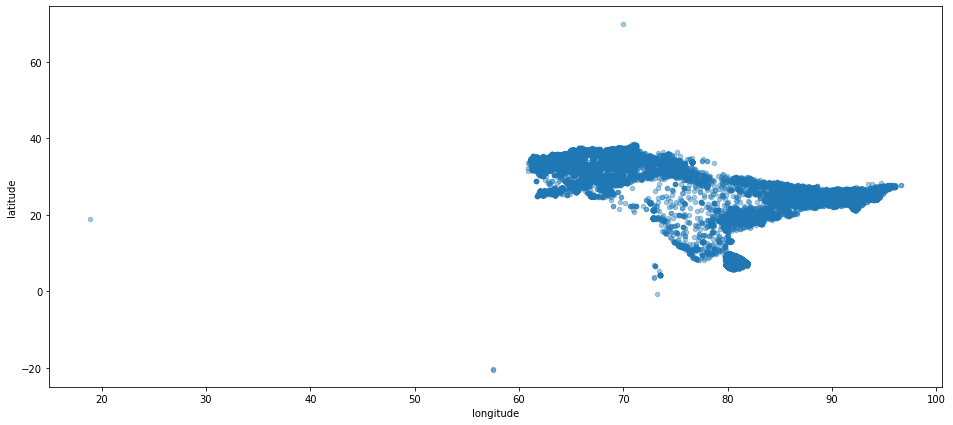

In [ ]:
#project the data according to longitude and latitude
df_SA.plot(kind= 'scatter', x='longitude', y='latitude', alpha=0.4, figsize=(16,7))
plt.show()

In [ ]:
#replace all the null data with mean values of the column values
df_SA['nkill'].fillna(0.686445, inplace=True)
df_SA['latitude'].fillna(47.004651, inplace=True)
df_SA['longitude'].fillna(10.921231, inplace=True)
df_SA['natlty1'].fillna(167.954530, inplace=True)

df_SA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54725 entries, 585 to 209704
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   iyear            54725 non-null  int64  
 1   imonth           54725 non-null  int64  
 2   iday             54725 non-null  int64  
 3   extended         54725 non-null  int64  
 4   country          54725 non-null  int64  
 5   country_txt      54725 non-null  object 
 6   latitude         54725 non-null  float64
 7   longitude        54725 non-null  float64
 8   multiple         54725 non-null  float64
 9   success          54725 non-null  int64  
 10  suicide          54725 non-null  int64  
 11  attacktype1      54725 non-null  int64  
 12  attacktype1_txt  54725 non-null  object 
 13  targtype1        54725 non-null  int64  
 14  targtype1_txt    54725 non-null  object 
 15  natlty1          54725 non-null  float64
 16  natlty1_txt      53570 non-null  object 
 17  individua

Train Test Split

In [ ]:
#splitting the data into training and test dataset
features = [ 'imonth', 'iday', 'extended',  'latitude', 'longitude', 'multiple','suicide','attacktype1','targtype1', 'individual', 'weaptype1', 'nkill']
X = df_SA.drop(['iyear', 'success','country', 'country_txt', 'attacktype1_txt','targtype1_txt','natlty1', 'natlty1_txt', 'weaptype1_txt'], axis=1)
y = df_SA['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Decision tree - max depth(3)

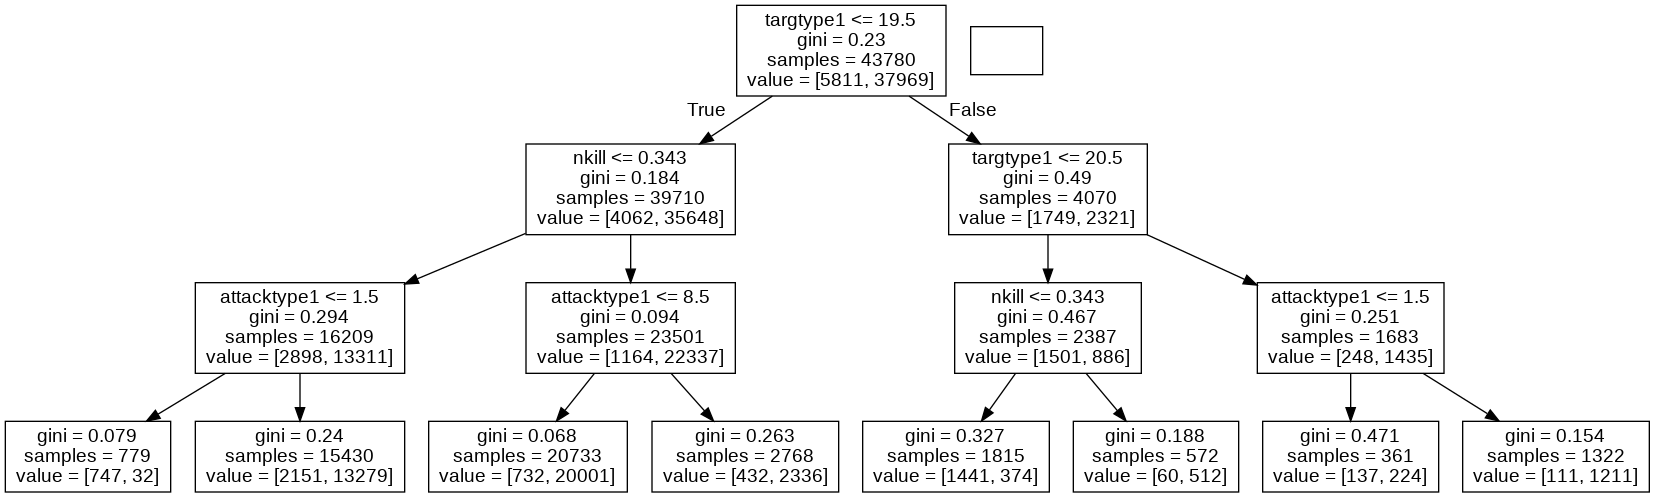

In [ ]:
y = df_SA['success'] #this is what we're trying to predict!
X = df_SA[features]
dtc = tree.DecisionTreeClassifier(max_depth=3) 
dtc = dtc.fit(X_train,y_train)

#code to print the underlying configuration
dot_data = StringIO()  
tree.export_graphviz(dtc, out_file=dot_data,feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 

In [ ]:
dtc_pred = dtc.predict(X_test)
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.82      0.37      0.51      1459
           1       0.91      0.99      0.95      9486

    accuracy                           0.91     10945
   macro avg       0.87      0.68      0.73     10945
weighted avg       0.90      0.91      0.89     10945



In [ ]:
print(confusion_matrix(y_test,dtc_pred))

[[ 540  919]
 [ 117 9369]]


Random Forest classification

In [ ]:
rfclass = RandomForestClassifier(n_estimators=400) 
rfclass = rfclass.fit(X_train, y_train)
rfclass_pred = rfclass.predict(X_test)

In [ ]:

print(classification_report(y_test,rfclass_pred))

              precision    recall  f1-score   support

           0       0.82      0.52      0.63      1459
           1       0.93      0.98      0.96      9486

    accuracy                           0.92     10945
   macro avg       0.87      0.75      0.79     10945
weighted avg       0.91      0.92      0.91     10945



In [ ]:
print(confusion_matrix(y_test,rfclass_pred))

[[ 756  703]
 [ 169 9317]]


In [ ]:
#listing iportance of features
for name, score in zip(X_train[features], rfclass.feature_importances_):
    print(name, score)

imonth 0.0868788121345782
iday 0.12503277594656464
extended 0.005534519795281753
latitude 0.16250238021226698
longitude 0.1644325005445991
multiple 0.012019870622600034
suicide 0.012486318677781596
attacktype1 0.09818724225162569
targtype1 0.17570222029649604
individual 0.00013439363291929145
weaptype1 0.026332986862470008
nkill 0.13075597902281677


In [ ]:
data = go.Bar(
    y=['suicide', 'individual', 'extended', 'multiple', 'weaptype1', 'nkill', 'attacktype1','targtype1', 
       'imonth',  'iday', 'latitude',  'longitude'],
    x=[0.001182,0.002047,0.002392,0.011422,0.041777,0.085776,0.107362,0.109867,0.113829,0.167432,0.173583,0.18333],   
    orientation = 'h',
    marker = dict(color = 'rgba(255,0,0, 0.6)', line = dict(width = 0.5)))

data = [data]
layout = go.Layout(title = 'Relative Importance of the Features in the Random Forest',
    barmode='group', bargap=0.1, width=800,height=500,)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

EXAMPLE OUTPUT FOR RANDOM FOREST CLASSIFICATION


In [ ]:
succeed_or_fail = RandomForestClassifier(n_estimators=400) 
succeed_or_fail = rfclass.fit(X, y) #clf

month = 12           # in which month would the attack take place
day = 23             # on which day of the month would the attack take place
extended = 0         # 1=yes, 0=no
latitude = 48.8566
longitude = 2.3522
multiple = 0         # attack is part of a multiple incident (1), or not (0)
suicide = 0          # suicide attack (1) or not (0)
attackType = 3       # 9 categories
targetType = 7       # 22 categories
individual = 0       # known group/organization (1) or not (0)
weaponType = 6       # 13 categories
nkill = 0            # number of total casualties from the attack

outcome = (succeed_or_fail.predict([[(month),(day),(extended),(latitude),(longitude),(multiple),(suicide),(attackType),(targetType),(individual),(weaponType),(nkill)]])) 
if outcome == 1:
    print(outcome)
    print("The attack based on these features would be succesful.")
elif outcome == 0:
    print(outcome)
    print("The attack based on these features would NOT be succesful.")

[1]
The attack based on these features would be succesful.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

